### Breast Cancer Classification

### Project Introduction: Breast Cancer Classification

Breast cancer is one of the most prevalent types of cancer, and early diagnosis is crucial for effective treatment and improved patient outcomes. This project focuses on building a **Breast Cancer Classification System** that leverages data analytics and machine learning to classify tumors as **benign** or **malignant** based on their characteristics.

#### Objectives
1. To utilize a well-structured breast cancer dataset for data analysis.
2. To preprocess the dataset for optimal performance, ensuring accurate classification.
3. To apply machine learning techniques, such as Principal Component Analysis (PCA) and classification algorithms, for dimensionality reduction and prediction.
4. To evaluate the performance of the model using metrics like accuracy, precision, recall, and F1-score.

#### Key Features
- **Dataset**: The project uses a **Wisconsin Breast Cancer** Dataset containing features such as radius, texture, perimeter, area, and smoothness of the tumor.
- **Dimensionality Reduction**: PCA is employed to reduce the complexity of the data while retaining the most significant information.
- **Machine Learning Models**: Algorithms like Logistic Regression, Support Vector Machines (SVM), and Random Forests are used to classify tumors.
- **Visualization**: Tools such as Matplotlib and Seaborn are used for feature analysis, PCA visualization, and understanding model performance.


This project not only addresses a critical healthcare challenge but also showcases the power of machine learning in medical diagnosis.

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset


In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# cancer

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
cancer.data.shape

(569, 30)

In [5]:
cancer.target.shape

(569,)

In [6]:
print("Sample counts per class:")
{n:v for n,v in zip(cancer.target_names, np.bincount(cancer.target))}

Sample counts per class:


{np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}

In [7]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [8]:
df_features=pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_target=pd.DataFrame(cancer.target, columns=["is_benign"])
df= pd.concat([df_features,df_target], axis = 1)

print(cancer.feature_names)
df

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,is_benign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


array([[<Axes: xlabel='mean radius', ylabel='mean radius'>,
        <Axes: xlabel='mean texture', ylabel='mean radius'>,
        <Axes: xlabel='mean perimeter', ylabel='mean radius'>,
        <Axes: xlabel='mean area', ylabel='mean radius'>,
        <Axes: xlabel='mean smoothness', ylabel='mean radius'>,
        <Axes: xlabel='mean compactness', ylabel='mean radius'>,
        <Axes: xlabel='mean concavity', ylabel='mean radius'>,
        <Axes: xlabel='mean concave points', ylabel='mean radius'>,
        <Axes: xlabel='mean symmetry', ylabel='mean radius'>,
        <Axes: xlabel='mean fractal dimension', ylabel='mean radius'>,
        <Axes: xlabel='radius error', ylabel='mean radius'>,
        <Axes: xlabel='texture error', ylabel='mean radius'>,
        <Axes: xlabel='perimeter error', ylabel='mean radius'>,
        <Axes: xlabel='area error', ylabel='mean radius'>,
        <Axes: xlabel='smoothness error', ylabel='mean radius'>,
        <Axes: xlabel='compactness error', ylabel='mea

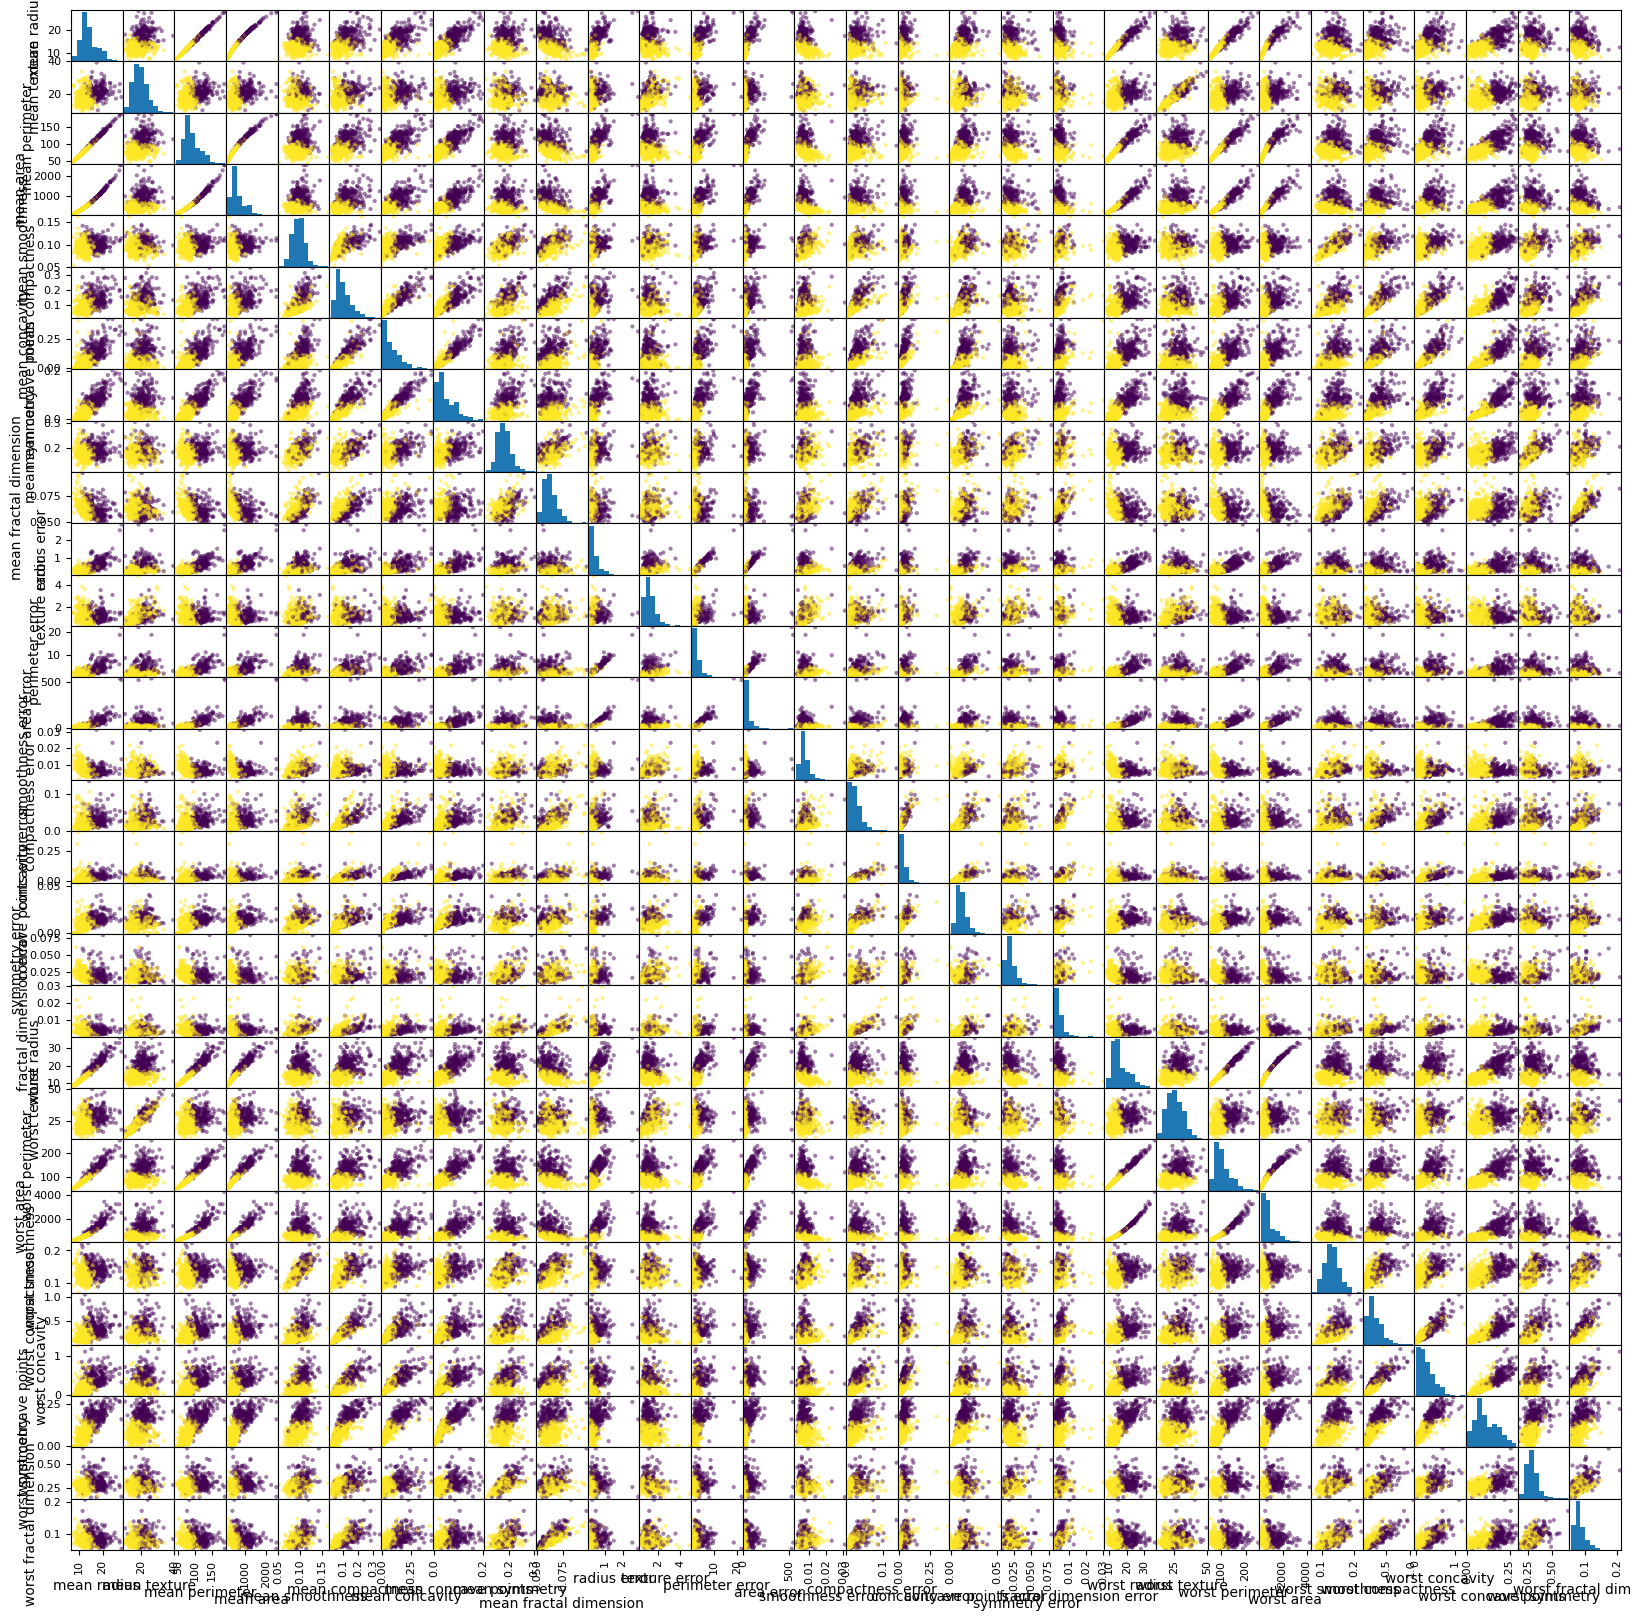

In [9]:
# cmap=plt.get_cmap("Set1")
pd.plotting.scatter_matrix(df_features, figsize=(20,20), c=cancer.target)

### Data Preprocessing


In [10]:
# from sklearn.preprocessing import StandardScaler
# x=StandardScaler().fit_transform(x)


x=df_features
x_mean=x.mean()
x_std=x.std()

x=(x-x_mean)/x_std

y=df_target

x.shape, y.shape

((569, 30), (569, 1))

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=111)
X_train.shape,X_test.shape,y_train.shape, y_test.shape

((455, 30), (114, 30), (455, 1), (114, 1))

<Axes: >

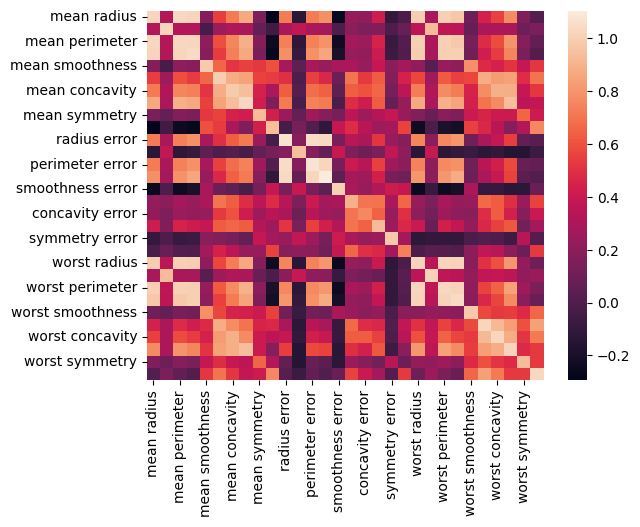

In [12]:
df_cov= X_train.cov()

sns.heatmap(df_cov)



Features show high correlation. We can perform PCA (Principal Component Analysis) for Dimensionality Reduction


### Principal Component Analysis


Eigen values and Eigen vectors


In [13]:
eigenvalues, eigenvectors=np.linalg.eig(df_cov)
print("Eigen values",eigenvalues)
print("Eigen values shape", eigenvalues.shape)
print("Eigen vector shape", eigenvectors.shape)

Eigen values [1.34982784e+01 5.40792346e+00 2.74653783e+00 2.01682590e+00
 1.50150901e+00 1.15125164e+00 7.06598849e-01 4.79765778e-01
 4.08325348e-01 3.55126531e-01 2.80814750e-01 2.19945311e-01
 1.92316790e-01 1.35638615e-01 9.82133193e-02 7.27773006e-02
 5.97981970e-02 5.35716319e-02 4.85999079e-02 1.27278737e-04
 7.63108271e-04 1.52195626e-03 6.48981217e-03 8.06835031e-03
 1.13400281e-02 1.65222281e-02 1.93170853e-02 3.14721497e-02
 2.56106608e-02 2.76250783e-02]
Eigen values shape (30,)
Eigen vector shape (30, 30)


In [14]:
#sorting
idx=eigenvalues.argsort()[::-1]
eigenvalues=eigenvalues[idx]
eigenvectors=eigenvectors[:,idx]

In [15]:
explained_variance=np.cumsum(eigenvalues)/np.sum(eigenvalues)
explained_variance

array([0.45628997, 0.63909707, 0.73193985, 0.80011576, 0.85087212,
       0.88978854, 0.9136741 , 0.92989189, 0.94369475, 0.95569929,
       0.96519183, 0.97262677, 0.97912776, 0.98371283, 0.98703279,
       0.98949292, 0.99151431, 0.99332523, 0.99496808, 0.99603195,
       0.99696577, 0.99783151, 0.99848449, 0.999043  , 0.99942634,
       0.99969908, 0.99991845, 0.9999699 , 0.9999957 , 1.        ])

In [16]:
# selecting no. of components
n=np.argmax(explained_variance>=0.5)+1
n

np.int64(2)

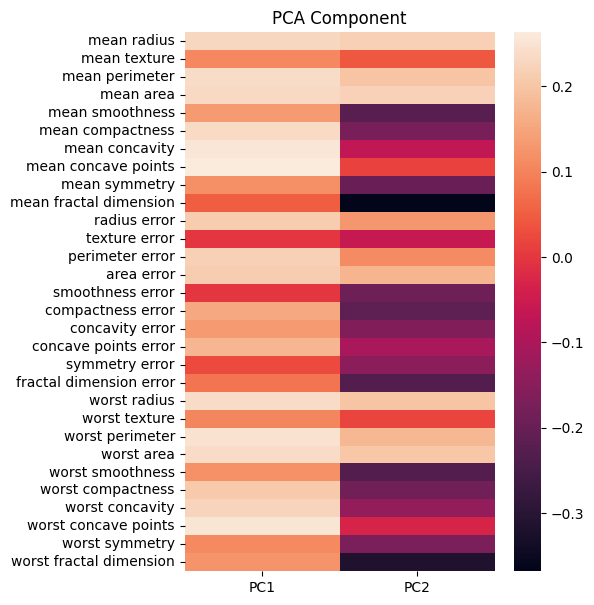

In [17]:
# Visualization of PCA for 2 Components
u = eigenvectors[:,:n]
pca_component_test = pd.DataFrame(u,
                             index = cancer['feature_names'],
                             columns = ['PC1','PC2']
                            )

# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component_test)
plt.title('PCA Component')
plt.show()

In [18]:
#projection of feature matrix on pc
df_pca=X_train @ pca_component_test

df_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2'}, axis=1, inplace=True)
print(df_pca)

         PCA1      PCA2
280  5.036704  0.767094
454 -2.757617  1.020034
295 -3.208191  1.597569
262  3.279655  1.186936
202  9.018664  0.133247
..        ...       ...
7    2.021227 -2.615236
118  4.840622 -2.949033
322 -1.789551 -0.471490
275 -1.378265 -0.486566
86   0.533462 -0.023920

[455 rows x 2 columns]


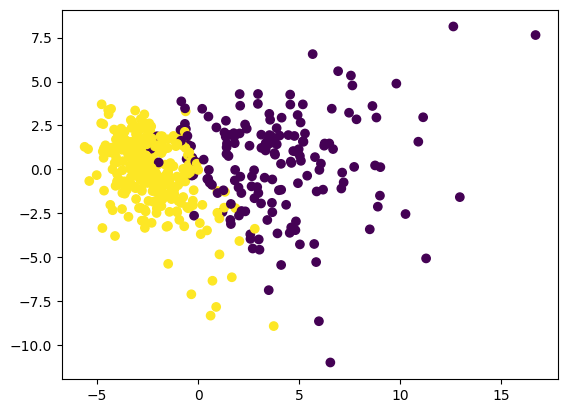

In [19]:
plt.scatter(df_pca["PCA1"],df_pca["PCA2"], c=y_train.to_numpy())

We have visualized the Data points with Two Principal Components as axes.

Now we will use 3 Principal Components, which will retain 73% of the Variance

In [20]:

number_of_components=3
u = eigenvectors[:,:number_of_components]
pca_component = pd.DataFrame(u,
                             index = cancer['feature_names'],
                            #  columns = ['PC1','PC2']
                            )

### Training the Model


In [21]:
model_performance={}

In [22]:
class Classifier:
    def __init__(self,model,pca=None):
        self.model=model
        self.pca=pca
    
    def fit(self,x_train,y_train):
        x=x_train @ self.pca
        x=x.to_numpy()

        return self.model.fit(x,y_train.to_numpy().reshape((-1)))
    
    def predict(self,x_test):
        x=x_test @ self.pca
        x=x.to_numpy()
        return self.model.predict(x)  


In [23]:
from sklearn.metrics import accuracy_score, classification_report

def results(y_test, y_pred):

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", report)

**KNN**

In [24]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn=Classifier(KNeighborsClassifier(n_neighbors =3),pca=pca_component)  

In [25]:
classifier_knn.fit(X_train, y_train)
(X_train @pca_component).shape, y_train.shape
y_pred=classifier_knn.predict(X_test)

In [26]:
model_performance["KNN"]=accuracy_score(y_test, y_pred)
results(y_test, y_pred)

Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        44
           1       0.96      0.96      0.96        70

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



**Decision Tree**

In [27]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=Classifier(DecisionTreeClassifier(),pca=pca_component)  

In [28]:
decision_tree.fit(X_train, y_train)
(X_train @pca_component).shape, y_train.shape
y_pred=decision_tree.predict(X_test)

In [29]:
model_performance["Decision Tree"]=accuracy_score(y_test, y_pred)
results(y_test, y_pred)

Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88        44
           1       0.95      0.89      0.92        70

    accuracy                           0.90       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114



**Random Forest**

In [30]:
from sklearn.ensemble import RandomForestClassifier
random_forest=Classifier(RandomForestClassifier(),pca=pca_component)  

In [31]:
random_forest.fit(X_train, y_train)
(X_train @pca_component).shape, y_train.shape
y_pred=random_forest.predict(X_test)

In [32]:
model_performance["Random Forest"]=accuracy_score(y_test, y_pred)
results(y_test, y_pred)

Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.92        44
           1       0.98      0.91      0.95        70

    accuracy                           0.94       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.94      0.94      0.94       114



**SVM**

In [33]:
from sklearn.svm import SVC
svm=Classifier(SVC(),pca=pca_component)  

In [34]:
svm.fit(X_train, y_train)
(X_train @pca_component).shape, y_train.shape
y_pred=svm.predict(X_test)

In [35]:
model_performance["SVM"]=accuracy_score(y_test, y_pred)
results(y_test, y_pred)

Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95        44
           1       0.99      0.94      0.96        70

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



### Comparing Performances

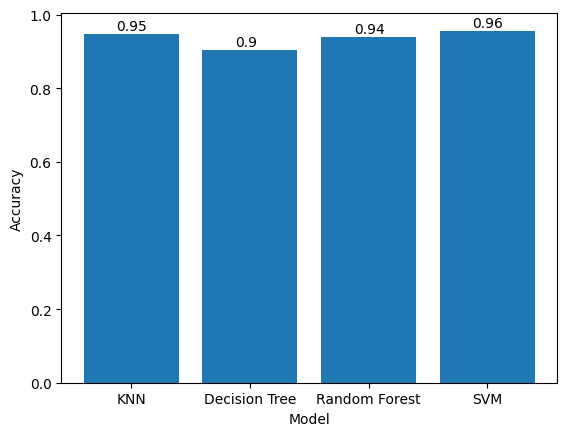

In [36]:
plt.bar(model_performance.keys(),model_performance.values(),)
plt.xlabel("Model")
plt.ylabel("Accuracy")

for i, v in enumerate(model_performance.values()):
    plt.text(i - 0.125, v + 0.01, str(round(v,2)))

### Conclusion

SVM performs the best with an accuracy of 96%